# Example Notebook for GaussBean Utilities

To start, let's import the submodules that we want to use into the file and specify a specific image we want to do our analysis on:

In [1]:
# I'm just going to import some packages that come in handy in this notebook, but you can feel free to exclude these in your own code if you don't need them
from PIL import Image
import numpy as np

# import all of the submodules for the useful utilities
from gaussbean.utils import pre_utils, calc_utils, plot_utils

# let's go ahead and specify the path of the image that we want to run all of our analysis on (the following path DOES NOT have to be the same as yours)
imgpath = "greenlaser.tiff" # ----> replace this path with "path/to/your/image.png"

## pre_utils and plot_utils

### <ins>Filters</ins>

Let's start our introduction to this module by using a median filter to get rid of some unwanted "salt and pepper" noise -- the spiky, intense, dead pixels that are always in the image but that we don't really care about.

In [2]:
# now, we can just call the function to run the image at this path through a median filter. This function returns an ARRAY
pre_utils.thru_median(imgpath=imgpath, mediansize=5, repeatamount=0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

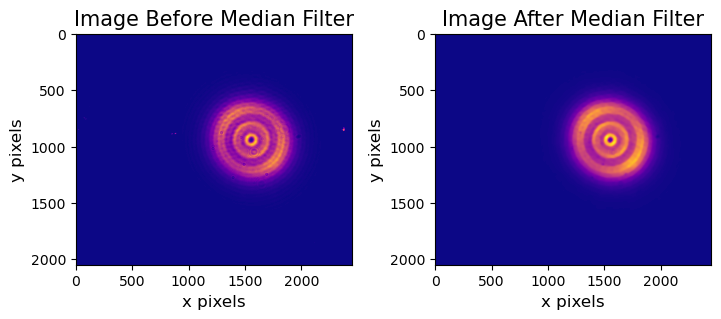

In [3]:
# if we use the plot_median() function, you get an plot of the original image and the image AFTER the median filter
plot_utils.plot_median(imgpath=imgpath, mediansize=30, repeatamount=0, clmap='plasma', fontsize=15)

We can do the same thing for the low-pass filter to get rid of larger, unwanted diffraction patterns that you might see in the original image. This filter, in a way, also *blurs* the image:

In [3]:
# now, we can just call the function to run the image at this path through a low-pass filter. This function returns an ARRAY
pre_utils.thru_lowpass(imgpath=imgpath, radius=5)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

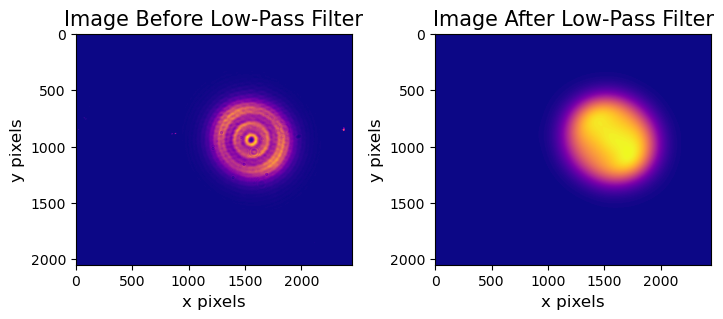

In [4]:
# if we use the plot_lowpass() function, you get an PLOT of the original image and the image AFTER the median filter
plot_utils.plot_lowpass(imgpath=imgpath, radius=5, clmap='plasma', fontsize=15)

You can show some more complicated plots, including one that shows the original image, as well as the image after each filter:

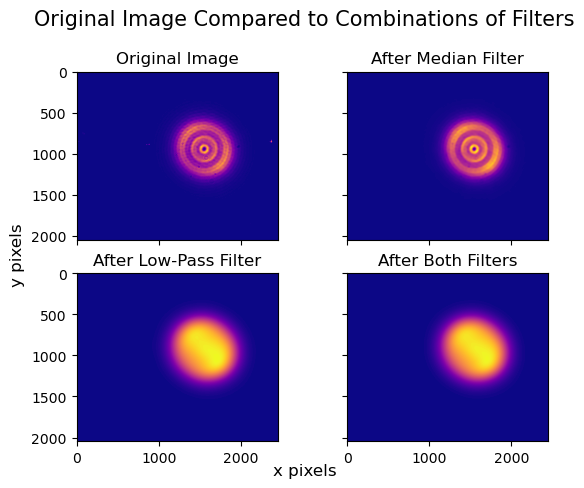

In [6]:
# show a more complicated plot of the image after each filter
plot_utils.plot_medandlow(mediansize=30, radius=5, repeatamount=0, imgpath=imgpath, clmap='plasma', fontsize=15)

### <ins> Image Cropping </ins>

If you so wish, you can also crop an image by specifying a point around which to crop as well as a "buffer" for the x- and y- axes in pixels that specifies how much "space" you want around the cropped point. Though this function doesn't have a built-in way to choose the centroid of the image, you can use the find_centroid() function shown in the section below to first find the centroid, then crop the image around that centroid.

In [5]:
# crop the image and return it in an array
pre_utils.crop_image(xpoint=1550, ypoint=950, xmargins=300, ymargins=300, imgpath=imgpath)

array([[19, 22, 23, ..., 13, 14, 14],
       [21, 26, 31, ..., 13, 12, 11],
       [20, 26, 27, ..., 16, 15, 10],
       ...,
       [ 9, 11, 10, ..., 20, 25, 23],
       [ 8, 11,  8, ..., 18, 26, 24],
       [10, 11,  7, ..., 26, 24, 21]], dtype=uint8)

Note that the following function (and ALL of the plotting functions), will do the specific task FOR you (in this case, cropping). Therefore, there's really no need to use the previous function if you just want to see what the cropping would look like.

In [5]:
# show the image before and after it's cropped
plot_utils.plot_cropped(xpoint=1550, ypoint=950, xmargins=300, ymargins=300, imgpath=imgpath, fontsize=15) 

TypeError: plot_cropped() got an unexpected keyword argument 'fontsize'

### <ins>Background Subtraction</ins>

We can also use the pre_utils module to do background subtraction on an image:

In [23]:
pre_utils.back_subtract(origpath=imgpath, backpath=imgpath)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
plot_utils.back_sub_plot(origpath=imgpath, backpath=imgpath, clmap='plasma', fontsize=15)

TypeError: plot_beforeandafter() got an unexpected keyword argument 'title'

### <ins> Intensity Plots Using Lineouts and Projections </ins>

If you want, you can even do more complicated plots, like intensity lineouts or projections. There are two different functions for each:

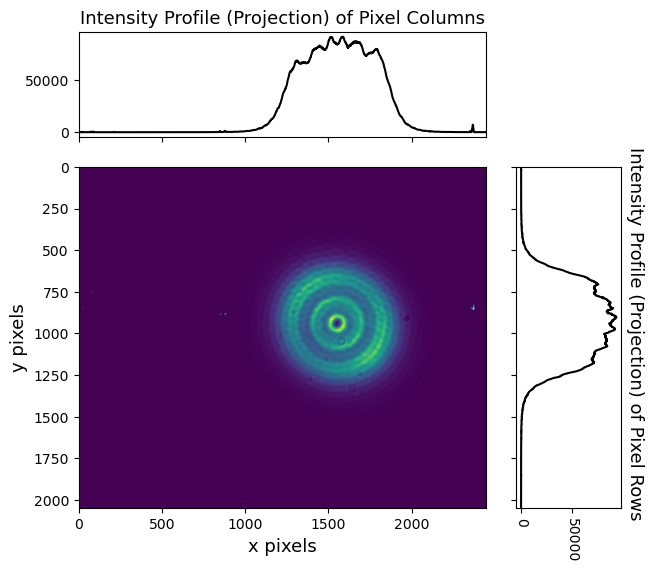

In [6]:
# this is how you plot an intensity profile for your image using PROJECTIONS. You can also use an array rather than an image path as an argument to this function
plot_utils.plot_intensity_proj(imgpath=imgpath)

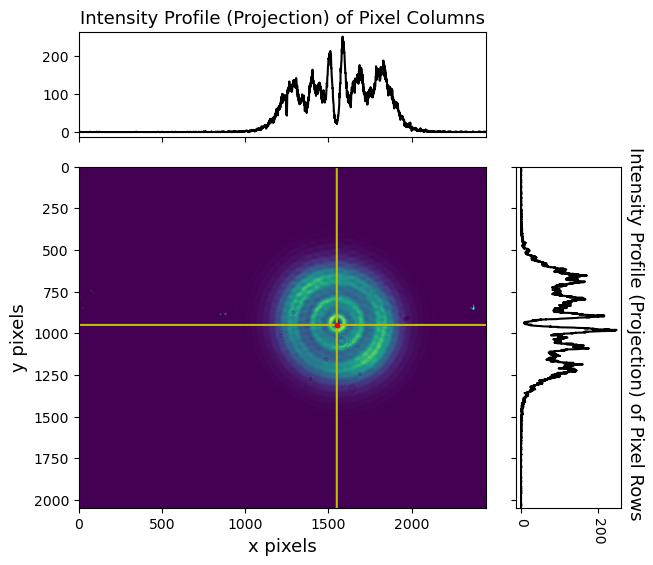

In [7]:
# this is how you plot an intensity profile for your image using LINEOUTS. You can also use an array rather than an image path as an argument to this function
plot_utils.plot_intensity_line(xpixel=1550, ypixel=950, toavg=0, imgpath=imgpath)

### <ins>General Plotting Functions</ins>

Finally, you can plot anything in a "before" and "after" format. All this means is that, like a lot of the above examples, if you edit an image for some reason, you can see a "before" and "after" of your image. For example, if I wanted to crop my image and then see the before and after (and, for some reason, not use the plot_cropped() function?? seriously just use it :D), I could just do that manually. The only caveat with this function is that, when you input the images into the function, they must BOTH be arrays.

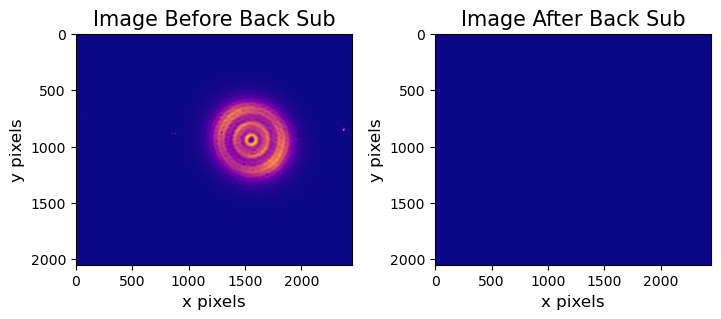

In [56]:
imgbefore = np.array(Image.open(imgpath))
imgafter = pre_utils.back_subtract(origpath=imgpath, backpath=imgpath)

plot_utils.plot_beforeandafter(before=imgbefore, after=imgafter, label='Back Sub', clmap='plasma', fontsize=15)

Notice that the figure above looks exactly like what we saw previously for the back_sub_plot() function, which is simply in a convenient form for the user (you).

## calc_utils

(this section is coming soon!)